Problem: How to determine which stocks are most affected by the coronavirus?

Hypothesis: The stock market is inversely correlated with the infection rate of covid-19.

Solution: 
1. Pull coronavirus infection data by date
2. Download stock price information since the coronavirus infection began
3. Calculate correlation between confirmed cases and stock market prices
4. Evaluate percentage of market change for individual stocks
5. Data exploration into correlation between stock market price and infection rate

# **Covid-19 kaggle dataset**

https://www.kaggle.com/imdevskp/corona-virus-report/data

In [1]:
# Import libraries
import datetime
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
import json
import numpy as np
import io


In [2]:
# Upload CSV file from local drive
from google.colab import files
uploaded = files.upload()

Saving covid_19_clean_complete.csv to covid_19_clean_complete (2).csv


In [3]:
# Store dataset in a Pandas Dataframe
import io
covid_df = pd.read_csv(io.BytesIO(uploaded['covid_19_clean_complete.csv']))
covid_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [4]:
# convert 'Date' to a datetime object
covid_df['Date'] = pd.to_datetime(covid_df.Date)

In [5]:
# Select Confirmed, Deaths and Revovered columns by date
covid_sum_df = covid_df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().sort_values('Date', ascending=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [6]:
# Dataframe Info
covid_sum_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2020-01-22 to 2020-07-27
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Confirmed  188 non-null    int64
 1   Deaths     188 non-null    int64
 2   Recovered  188 non-null    int64
dtypes: int64(3)
memory usage: 5.9 KB


In [7]:
covid_sum_df.head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555,17,28
2020-01-23,654,18,30
2020-01-24,941,26,36
2020-01-25,1434,42,39
2020-01-26,2118,56,52


In [8]:
# Descriptive Stats
covid_sum_df.describe()

,Confirmed,Deaths,Recovered
count,1.880000e+02,188.000000,1.880000e+02
mean,4.406960e+06,230770.760638,2.066001e+06
std,4.757988e+06,217929.094183,2.627976e+06
min,5.550000e+02,17.000000,2.800000e+01
25%,1.121910e+05,3935.000000,6.044125e+04
50%,2.848733e+06,204190.000000,7.847840e+05
75%,7.422046e+06,418634.500000,3.416396e+06
max,1.648048e+07,654036.000000,9.468087e+06


# **Yfinance**

In [12]:
# Install yfinance
!pip install yfinance

     |████████████████████████████████| 5.5MB 5.9MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=6c6fd9c991cdceea126df71356bf237748a1436803f7d4316eab7fcc99f5933e
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [61]:
# Create datetime objects 
import datetime
from pandas_datareader import data as pdr
import yfinance as yf

# To grab stock data
yf.pdr_override()

In [62]:
# Set label for Dow 30
stocks = ["^IXIC", "^GSPC", "^DJI", "AXP", "AAPL", "BA", "CAT", "CSCO", "CVX", "XOM", "GS", "HD", "IBM", 
          "INTC", "JNJ", "KO", "JPM", "MCD", "MMM", "MRK", "MSFT", "NKE", "PFE",
          "PG", "TRV", "UNH", "UTX", "VZ", "V", "WBA", "WMT", "DIS", "DOW"]

# Set start and end dates
start = datetime.datetime(2020, 1, 1)
end   = datetime.datetime(2020, 7, 27)

# Grab data
data = pdr.get_data_yahoo(stocks, start = start, end = end)

[*********************100%***********************]  33 of 33 completed


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142 entries, 2020-01-02 to 2020-07-24
Columns: 198 entries, ('Adj Close', 'AAPL') to ('Volume', '^IXIC')
dtypes: float64(166), int64(32)
memory usage: 220.8 KB


In [64]:
data.head()

Adj Close                ...     Volume                        
                AAPL    AXP     BA  ...       ^DJI       ^GSPC       ^IXIC
Date                                ...                                   
2020-01-02     74.57 124.07 331.35  ...  251820000  3458250000  2848370000
2020-01-03     73.85 122.84 330.79  ...  239590000  3461290000  2567400000
2020-01-06     74.44 122.31 331.77  ...  252760000  3674070000  2788120000
2020-01-07     74.09 121.67 335.29  ...  258900000  3420380000  2352850000
2020-01-08     75.28 123.77 329.41  ...  291750000  3720890000  2464090000

[5 rows x 198 columns]

In [65]:
# Select only Adjusted Closed Stock Price
adj_close = ['Adj Close']
data[adj_close]

Adj Close                       ...                                
                AAPL    AXP     BA    CAT  ...   XOM     ^DJI   ^GSPC    ^IXIC
Date                                       ...                                
2020-01-02     74.57 124.07 331.35 147.02  ... 67.24 28868.80 3257.85  9092.19
2020-01-03     73.85 122.84 330.79 144.98  ... 66.70 28634.88 3234.85  9020.77
2020-01-06     74.44 122.31 331.77 144.88  ... 67.21 28703.38 3246.28  9071.47
2020-01-07     74.09 121.67 335.29 142.97  ... 66.66 28583.68 3237.18  9068.58
2020-01-08     75.28 123.77 329.41 144.24  ... 65.66 28745.09 3253.05  9129.24
...              ...    ...    ...    ...  ...   ...      ...     ...      ...
2020-07-20     98.18  93.61 174.42 134.63  ... 41.68 26680.87 3251.84 10767.09
2020-07-21     96.83  95.93 178.63 135.87  ... 43.79 26840.40 3257.30 10680.36
2020-07-22     97.10  96.14 179.79 136.98  ... 42.77 27005.84 3276.02 10706.13
2020-07-23     92.68  96.27 176.45 136.60  ... 42.85 26652.33 3235.66 10461.42
2020-07-24     92.45  94.93 173.76 137.58  ... 42.59 26469.89 3215.63 10363.18

[142 rows x 33 columns]

In [66]:
data[adj_close].describe()

Adj Close                       ...                                 
           AAPL    AXP     BA    CAT  ...    XOM     ^DJI   ^GSPC    ^IXIC
count    142.00 142.00 142.00 142.00  ... 142.00   142.00  142.00   142.00
mean      77.58 101.87 208.73 122.71  ...  47.49 25651.99 3017.56  9118.05
std        9.96  18.32  80.23  13.58  ...   9.37  2599.81  270.34   918.24
min       55.84  67.99  95.01  90.34  ...  30.25 18591.93 2237.40  6860.67
25%       71.10  87.57 141.16 112.39  ...  41.70 23767.40 2849.44  8605.65
50%       78.03  96.03 179.33 124.56  ...  44.23 25789.76 3082.29  9255.02
75%       81.36 121.05 306.78 134.28  ...  54.08 27863.71 3236.80  9729.89
max       98.18 134.99 345.40 147.02  ...  67.24 29551.42 3386.15 10767.09

[8 rows x 33 columns]

In [67]:
# Write adj_close dataframe to yfinance_df
yfinance_df = data[adj_close]

In [68]:
yfinance_df

Adj Close                       ...                                
                AAPL    AXP     BA    CAT  ...   XOM     ^DJI   ^GSPC    ^IXIC
Date                                       ...                                
2020-01-02     74.57 124.07 331.35 147.02  ... 67.24 28868.80 3257.85  9092.19
2020-01-03     73.85 122.84 330.79 144.98  ... 66.70 28634.88 3234.85  9020.77
2020-01-06     74.44 122.31 331.77 144.88  ... 67.21 28703.38 3246.28  9071.47
2020-01-07     74.09 121.67 335.29 142.97  ... 66.66 28583.68 3237.18  9068.58
2020-01-08     75.28 123.77 329.41 144.24  ... 65.66 28745.09 3253.05  9129.24
...              ...    ...    ...    ...  ...   ...      ...     ...      ...
2020-07-20     98.18  93.61 174.42 134.63  ... 41.68 26680.87 3251.84 10767.09
2020-07-21     96.83  95.93 178.63 135.87  ... 43.79 26840.40 3257.30 10680.36
2020-07-22     97.10  96.14 179.79 136.98  ... 42.77 27005.84 3276.02 10706.13
2020-07-23     92.68  96.27 176.45 136.60  ... 42.85 26652.33 3235.66 10461.42
2020-07-24     92.45  94.93 173.76 137.58  ... 42.59 26469.89 3215.63 10363.18

[142 rows x 33 columns]

# **Merge yfinance and covid_19 dataframes by date**

In [69]:
# Merge by yfinance and covid dataframes by Index
covid_yfinance_df = pd.merge(covid_sum_df,yfinance_df, how='inner', left_index=True, right_index=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [70]:
covid_yfinance_df.head()

,Confirmed,Deaths,Recovered,"(Adj Close, AAPL)","(Adj Close, AXP)","(Adj Close, BA)","(Adj Close, CAT)","(Adj Close, CSCO)","(Adj Close, CVX)","(Adj Close, DIS)","(Adj Close, DOW)","(Adj Close, GS)","(Adj Close, HD)","(Adj Close, IBM)","(Adj Close, INTC)","(Adj Close, JNJ)","(Adj Close, JPM)","(Adj Close, KO)","(Adj Close, MCD)","(Adj Close, MMM)","(Adj Close, MRK)","(Adj Close, MSFT)","(Adj Close, NKE)","(Adj Close, PFE)","(Adj Close, PG)","(Adj Close, TRV)","(Adj Close, UNH)","(Adj Close, UTX)","(Adj Close, V)","(Adj Close, VZ)","(Adj Close, WBA)","(Adj Close, WMT)","(Adj Close, XOM)","(Adj Close, ^DJI)","(Adj Close, ^GSPC)","(Adj Close, ^IXIC)"
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,555,17,28,78.88,129.63,307.17,140.28,47.79,108.42,144.01,48.42,242.55,228.77,138.70,61.65,145.33,132.74,56.14,207.52,173.12,87.58,164.39,103.71,39.01,123.95,138.44,296.79,153.06,206.94,58.55,51.77,114.61,63.72,29186.27,3321.75,9383.77
2020-01-23,654,18,30,79.26,129.51,315.91,140.40,47.72,108.61,142.20,47.83,241.11,229.51,137.72,62.23,145.60,132.60,56.35,209.46,172.84,86.51,165.40,102.25,39.51,123.38,131.43,295.67,153.07,205.57,58.58,51.65,114.32,63.32,29160.09,3325.54,9402.48
2020-01-24,941,26,36,79.03,133.20,321.14,138.07,47.57,107.41,140.08,46.15,237.52,227.89,135.49,67.29,145.40,129.31,56.21,207.32,173.24,83.99,163.74,101.27,38.65,123.53,132.01,289.11,152.46,204.05,58.36,50.43,112.90,62.90,28989.73,3295.47,9314.91
2020-01-27,2927,82,61,76.71,128.79,314.73,133.50,46.23,106.01,135.90,44.91,233.81,227.09,133.62,64.56,145.82,128.22,56.01,205.46,170.79,84.11,161.00,99.49,38.98,124.07,130.98,280.50,150.31,200.76,58.00,50.62,114.37,61.40,28535.80,3243.63,9139.31
2020-01-28,5578,131,107,78.88,130.58,314.69,134.49,46.52,106.71,138.37,44.89,238.17,229.72,134.52,66.15,146.55,130.55,55.56,206.49,161.02,84.26,164.15,99.66,37.02,124.41,131.63,282.25,152.14,201.91,58.76,51.15,115.10,61.31,28722.85,3276.24,9269.68


In [71]:
# Rename Columns
covid_yfinance_df.columns = ['Confirmed', 'Deaths','Recovered',
                     'Apple Inc','American Express Co','Boeing Co', 'Caterpillar Inc', 'Cisco Systems Inc', 'Chevron Corp', 'Walt Disney Co',
                     'Dow Inc', 'Goldman Sachs Group Inc', 'Home Depot Inc', 'International Business Machines Corp', 'Intel Corp', 'Johnson & Johnson', 
                     'JPMorgan Chase & Co', 'Coca-Cola Co', 'McDonalds Corp', '3M Co', 'Merck & Co Inc', 'Microsoft Corp', 'Nike Inc', 'Pfizer Inc', 
                     'Procter & Gamble Co', 'Travelers Companies Inc', 'UnitedHealth Group Inc', 'United Technologies Corp', 'Visa Inc', 'Verizon Communications Inc', 
                     'Walgreens Boots Alliance Inc', 'Walmart Inc', 'Exxon Mobil Corp', 'Dow Jones Industrial','S&P 500 Index','Nasdaq Composite']

In [72]:
covid_yfinance_df.head()

,Confirmed,Deaths,Recovered,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp,Dow Jones Industrial,S&P 500 Index,Nasdaq Composite
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,555,17,28,78.88,129.63,307.17,140.28,47.79,108.42,144.01,48.42,242.55,228.77,138.70,61.65,145.33,132.74,56.14,207.52,173.12,87.58,164.39,103.71,39.01,123.95,138.44,296.79,153.06,206.94,58.55,51.77,114.61,63.72,29186.27,3321.75,9383.77
2020-01-23,654,18,30,79.26,129.51,315.91,140.40,47.72,108.61,142.20,47.83,241.11,229.51,137.72,62.23,145.60,132.60,56.35,209.46,172.84,86.51,165.40,102.25,39.51,123.38,131.43,295.67,153.07,205.57,58.58,51.65,114.32,63.32,29160.09,3325.54,9402.48
2020-01-24,941,26,36,79.03,133.20,321.14,138.07,47.57,107.41,140.08,46.15,237.52,227.89,135.49,67.29,145.40,129.31,56.21,207.32,173.24,83.99,163.74,101.27,38.65,123.53,132.01,289.11,152.46,204.05,58.36,50.43,112.90,62.90,28989.73,3295.47,9314.91
2020-01-27,2927,82,61,76.71,128.79,314.73,133.50,46.23,106.01,135.90,44.91,233.81,227.09,133.62,64.56,145.82,128.22,56.01,205.46,170.79,84.11,161.00,99.49,38.98,124.07,130.98,280.50,150.31,200.76,58.00,50.62,114.37,61.40,28535.80,3243.63,9139.31
2020-01-28,5578,131,107,78.88,130.58,314.69,134.49,46.52,106.71,138.37,44.89,238.17,229.72,134.52,66.15,146.55,130.55,55.56,206.49,161.02,84.26,164.15,99.66,37.02,124.41,131.63,282.25,152.14,201.91,58.76,51.15,115.10,61.31,28722.85,3276.24,9269.68


In [73]:
# Info
covid_yfinance_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129 entries, 2020-01-22 to 2020-07-24
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Confirmed                             129 non-null    int64  
 1   Deaths                                129 non-null    int64  
 2   Recovered                             129 non-null    int64  
 3   Apple Inc                             129 non-null    float64
 4   American Express Co                   129 non-null    float64
 5   Boeing Co                             129 non-null    float64
 6   Caterpillar Inc                       129 non-null    float64
 7   Cisco Systems Inc                     129 non-null    float64
 8   Chevron Corp                          129 non-null    float64
 9   Walt Disney Co                        129 non-null    float64
 10  Dow Inc                               129 non-null    float64
 11  

In [74]:
#Confirmed = covid_df['Confirmed'].sum()
covid_sum = covid_df.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().max()
#recent_date = df['StartDate'].max()

#print (Confirmed)
print (covid_sum)

Confirmed    16480485
Deaths         654036
Recovered     9468087
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [75]:
# Describe
covid_yfinance_df.describe()

,Confirmed,Deaths,Recovered,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp,Dow Jones Industrial,S&P 500 Index,Nasdaq Composite
count,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,54.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00,129.00
mean,4259870.33,225271.92,1980094.27,77.68,99.46,196.65,120.56,42.93,88.66,115.48,37.40,194.26,225.85,122.54,58.78,142.11,101.29,48.04,186.23,149.27,78.10,177.97,91.93,34.88,117.32,111.12,279.84,123.67,185.26,54.84,43.98,119.97,45.63,25322.08,2991.45,9109.28
std,4627112.36,215055.63,2533798.55,10.43,17.47,74.03,12.33,3.67,11.92,14.47,6.61,26.87,25.86,12.79,4.80,8.00,16.46,5.40,16.89,10.44,3.90,18.66,9.03,2.47,5.91,14.43,23.46,31.37,16.50,2.10,4.06,6.40,7.66,2498.36,270.01,962.55
min,555.00,17.00,28.00,55.84,67.99,95.01,90.34,32.33,52.68,85.76,21.29,133.32,150.45,92.31,44.06,109.65,76.75,36.92,135.40,115.66,65.40,134.72,62.51,27.94,96.44,80.54,193.23,49.93,135.31,48.35,37.49,102.72,30.25,18591.93,2237.40,6860.67
25%,113166.00,3981.00,60891.00,70.42,86.82,139.00,111.36,40.52,84.02,104.50,32.04,175.01,210.52,116.19,57.46,139.70,89.62,44.52,178.64,143.01,76.02,164.65,86.77,33.10,113.89,99.04,271.89,96.43,174.06,53.61,40.88,114.83,41.49,23719.37,2836.74,8566.48
50%,2719327.00,194727.00,721689.00,78.61,94.65,175.66,122.23,44.14,89.00,115.92,38.84,196.43,233.09,120.33,58.99,145.16,95.98,45.96,185.24,151.01,78.15,179.82,94.96,35.37,117.39,112.02,286.27,133.30,191.12,55.19,42.67,119.60,43.70,25605.54,3041.31,9273.40
75%,7253492.00,412236.00,3317121.00,83.82,108.38,231.01,131.17,45.85,94.42,120.95,42.17,211.85,244.84,127.38,61.65,147.27,109.14,52.13,197.27,156.42,80.44,187.29,98.99,36.96,122.90,122.28,295.93,152.13,196.57,56.34,46.60,123.82,49.35,26840.40,3207.18,9757.22
max,15791645.00,639650.00,8939705.00,98.18,134.99,345.40,140.40,48.63,108.61,144.73,48.42,242.55,263.92,151.27,67.29,153.42,134.02,58.60,213.43,173.24,87.58,213.80,104.06,39.51,126.16,138.44,309.24,156.09,212.63,58.76,52.79,132.12,63.72,29551.42,3386.15,10767.09


In [76]:
CDR_df = covid_yfinance_df[['Confirmed', 'Deaths', 'Recovered']]


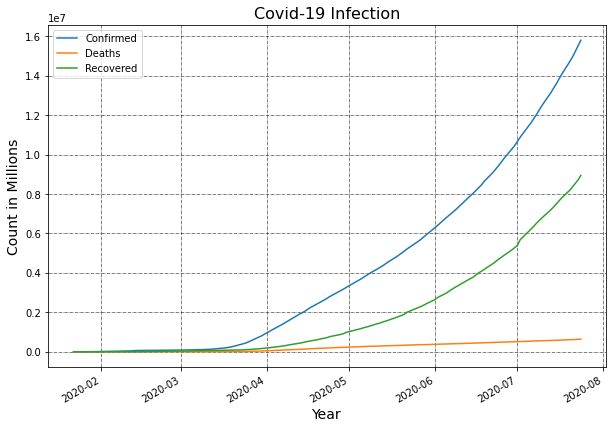

In [77]:
# Plot all the close prices
CDR_df.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Covid-19 Infection", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Count in Millions', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [78]:
DSN_df = covid_yfinance_df[['Dow Jones Industrial', 'S&P 500 Index', 'Nasdaq Composite']]

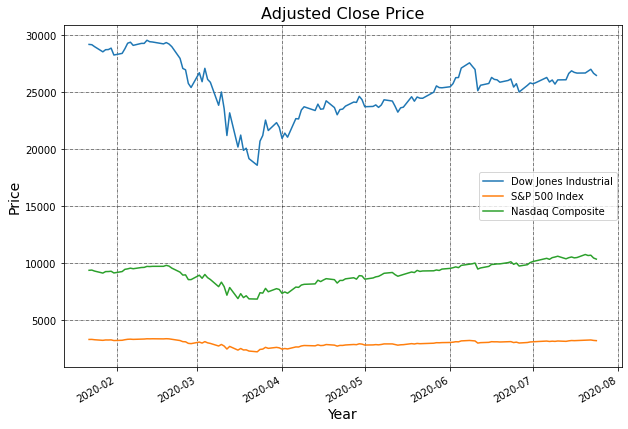

In [79]:
# Plot all the close prices
DSN_df.plot(figsize=(10, 7))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [80]:
Dow_stocks = covid_yfinance_df[['Apple Inc','American Express Co','Boeing Co', 'Caterpillar Inc', 'Cisco Systems Inc', 'Chevron Corp', 'Walt Disney Co',
                     'Dow Inc', 'Goldman Sachs Group Inc', 'Home Depot Inc', 'International Business Machines Corp', 'Intel Corp', 'Johnson & Johnson', 
                     'JPMorgan Chase & Co', 'Coca-Cola Co', 'McDonalds Corp', '3M Co', 'Merck & Co Inc', 'Microsoft Corp', 'Nike Inc', 'Pfizer Inc', 
                     'Procter & Gamble Co', 'Travelers Companies Inc', 'UnitedHealth Group Inc', 'United Technologies Corp', 'Visa Inc', 'Verizon Communications Inc', 
                     'Walgreens Boots Alliance Inc', 'Walmart Inc', 'Exxon Mobil Corp']]

In [81]:
Dow_stocks.head()

,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,78.88,129.63,307.17,140.28,47.79,108.42,144.01,48.42,242.55,228.77,138.70,61.65,145.33,132.74,56.14,207.52,173.12,87.58,164.39,103.71,39.01,123.95,138.44,296.79,153.06,206.94,58.55,51.77,114.61,63.72
2020-01-23,79.26,129.51,315.91,140.40,47.72,108.61,142.20,47.83,241.11,229.51,137.72,62.23,145.60,132.60,56.35,209.46,172.84,86.51,165.40,102.25,39.51,123.38,131.43,295.67,153.07,205.57,58.58,51.65,114.32,63.32
2020-01-24,79.03,133.20,321.14,138.07,47.57,107.41,140.08,46.15,237.52,227.89,135.49,67.29,145.40,129.31,56.21,207.32,173.24,83.99,163.74,101.27,38.65,123.53,132.01,289.11,152.46,204.05,58.36,50.43,112.90,62.90
2020-01-27,76.71,128.79,314.73,133.50,46.23,106.01,135.90,44.91,233.81,227.09,133.62,64.56,145.82,128.22,56.01,205.46,170.79,84.11,161.00,99.49,38.98,124.07,130.98,280.50,150.31,200.76,58.00,50.62,114.37,61.40
2020-01-28,78.88,130.58,314.69,134.49,46.52,106.71,138.37,44.89,238.17,229.72,134.52,66.15,146.55,130.55,55.56,206.49,161.02,84.26,164.15,99.66,37.02,124.41,131.63,282.25,152.14,201.91,58.76,51.15,115.10,61.31


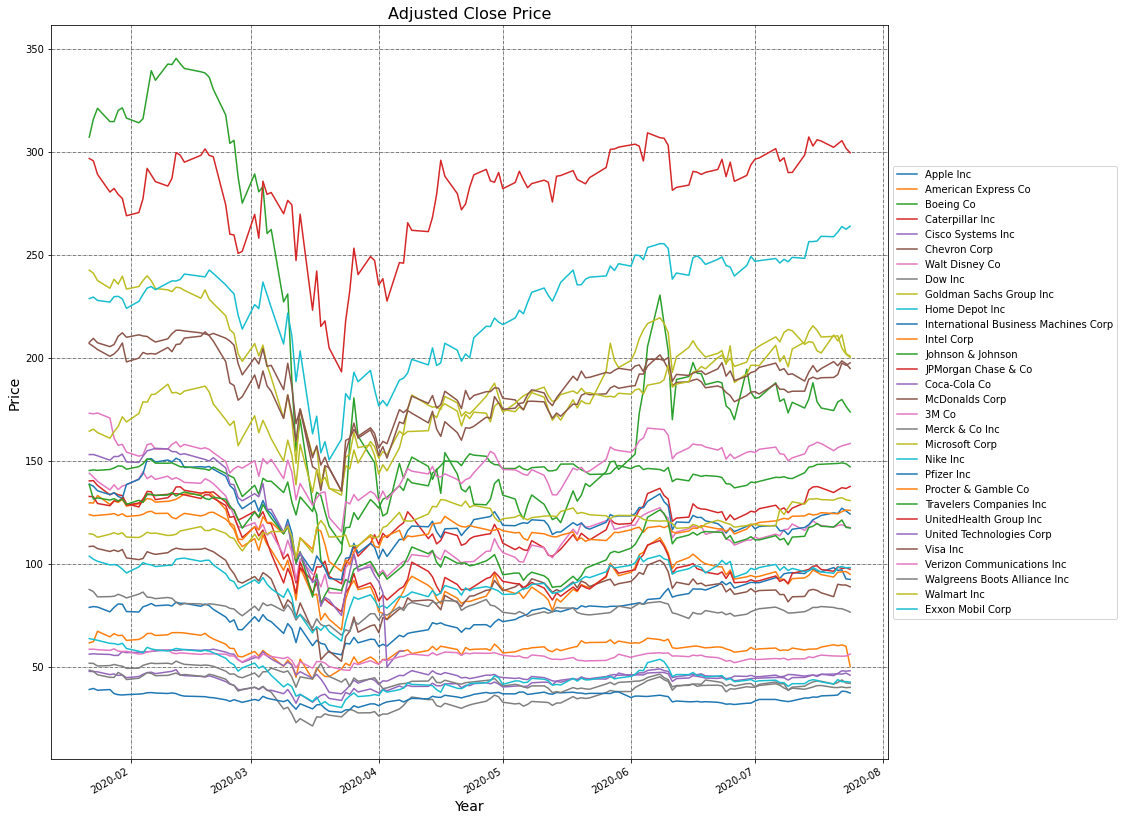

In [82]:
# Plot all the close prices
Dow_stocks.plot(figsize=(15, 15))
# Show the legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [83]:
# Whole dataframe correlation examination
covid_yfinance_df[['Confirmed', 'Deaths', 'Recovered', 'Dow Jones Industrial', 'S&P 500 Index', 'Nasdaq Composite']].corr()

,Confirmed,Deaths,Recovered,Dow Jones Industrial,S&P 500 Index,Nasdaq Composite
Confirmed,1.00,0.98,0.99,0.12,0.31,0.72
Deaths,0.98,1.00,0.94,0.08,0.27,0.70
Recovered,0.99,0.94,1.00,0.17,0.35,0.73
Dow Jones Industrial,0.12,0.08,0.17,1.00,0.98,0.76
S&P 500 Index,0.31,0.27,0.35,0.98,1.00,0.87
Nasdaq Composite,0.72,0.70,0.73,0.76,0.87,1.00


In [84]:
# Whole dataframe correlation examination
covid_corr = covid_yfinance_df.corr()

In [85]:
covid_corr

,Confirmed,Deaths,Recovered,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp,Dow Jones Industrial,S&P 500 Index,Nasdaq Composite
Confirmed,1.00,0.98,0.99,0.82,-0.26,-0.33,0.34,0.48,-0.04,-0.03,0.26,0.12,0.64,-0.14,0.08,0.26,-0.34,-0.42,-0.01,0.35,-0.13,0.83,0.40,0.07,0.26,-0.02,0.54,-0.80,0.30,-0.06,-0.62,0.64,-0.21,0.12,0.31,0.72
Deaths,0.98,1.00,0.94,0.78,-0.32,-0.41,0.26,0.48,-0.03,-0.08,0.21,0.07,0.65,-0.17,0.11,0.31,-0.41,-0.49,-0.05,0.33,-0.14,0.83,0.40,0.12,0.18,-0.11,0.58,-0.77,0.28,-0.05,-0.69,0.67,-0.24,0.08,0.27,0.70
Recovered,0.99,0.94,1.00,0.83,-0.19,-0.24,0.39,0.48,-0.02,0.02,0.30,0.17,0.64,-0.11,0.06,0.22,-0.27,-0.35,0.03,0.37,-0.11,0.82,0.41,0.03,0.31,0.06,0.52,-0.89,0.32,-0.06,-0.55,0.59,-0.18,0.17,0.35,0.73
Apple Inc,0.82,0.78,0.83,1.00,0.29,0.20,0.70,0.81,0.48,0.50,0.70,0.62,0.91,0.37,0.52,0.53,0.19,0.10,0.49,0.72,0.28,0.94,0.79,0.34,0.63,0.46,0.80,0.93,0.76,0.31,-0.19,0.45,0.33,0.64,0.77,0.97
American Express Co,-0.26,-0.32,-0.19,0.29,1.00,0.96,0.73,0.56,0.85,0.94,0.83,0.90,0.44,0.90,0.69,0.37,0.98,0.92,0.89,0.68,0.66,0.14,0.67,0.37,0.62,0.92,0.37,0.96,0.78,0.61,0.78,-0.40,0.94,0.89,0.79,0.42
Boeing Co,-0.33,-0.41,-0.24,0.20,0.96,1.00,0.67,0.44,0.77,0.87,0.75,0.83,0.34,0.86,0.57,0.26,0.97,0.94,0.85,0.56,0.61,0.06,0.56,0.26,0.60,0.92,0.25,0.96,0.68,0.53,0.80,-0.47,0.89,0.84,0.71,0.33
Caterpillar Inc,0.34,0.26,0.39,0.70,0.73,0.67,1.00,0.85,0.76,0.83,0.94,0.89,0.73,0.77,0.74,0.57,0.70,0.61,0.82,0.87,0.66,0.61,0.87,0.46,0.81,0.85,0.65,0.81,0.85,0.67,0.35,0.13,0.76,0.89,0.90,0.79
Cisco Systems Inc,0.48,0.48,0.48,0.81,0.56,0.44,0.85,1.00,0.75,0.77,0.87,0.81,0.84,0.69,0.85,0.72,0.50,0.37,0.71,0.86,0.62,0.78,0.93,0.63,0.72,0.62,0.82,0.81,0.87,0.64,0.13,0.34,0.67,0.82,0.89,0.89
Chevron Corp,-0.04,-0.03,-0.02,0.48,0.85,0.77,0.76,0.75,1.00,0.91,0.86,0.91,0.70,0.93,0.87,0.71,0.83,0.79,0.93,0.80,0.78,0.41,0.84,0.70,0.70,0.81,0.70,0.91,0.89,0.77,0.47,-0.06,0.94,0.93,0.90,0.64
Walt Disney Co,-0.03,-0.08,0.02,0.50,0.94,0.87,0.83,0.77,0.91,1.00,0.92,0.96,0.64,0.93,0.82,0.55,0.91,0.83,0.92,0.79,0.71,0.37,0.82,0.55,0.71,0.89,0.57,0.94,0.90,0.65,0.61,-0.15,0.94,0.96,0.91,0.63


In [86]:
# Returning only first and last row from dataframe
p_change_df = Dow_stocks.iloc[[0, -1]]
p_change_df

,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,78.88,129.63,307.17,140.28,47.79,108.42,144.01,48.42,242.55,228.77,138.70,61.65,145.33,132.74,56.14,207.52,173.12,87.58,164.39,103.71,39.01,123.95,138.44,296.79,153.06,206.94,58.55,51.77,114.61,63.72
2020-07-24,92.45,94.93,173.76,137.58,45.98,88.85,117.61,41.96,200.26,263.92,124.16,50.25,147.14,97.38,48.10,197.56,158.40,76.54,200.81,98.21,37.30,125.96,117.40,299.56,nan,194.86,56.25,40.05,130.70,42.59


In [87]:
# Find percent of change between First and Last dates
Percent_df = p_change_df.pct_change(axis='rows')
Percent_df

,Apple Inc,American Express Co,Boeing Co,Caterpillar Inc,Cisco Systems Inc,Chevron Corp,Walt Disney Co,Dow Inc,Goldman Sachs Group Inc,Home Depot Inc,International Business Machines Corp,Intel Corp,Johnson & Johnson,JPMorgan Chase & Co,Coca-Cola Co,McDonalds Corp,3M Co,Merck & Co Inc,Microsoft Corp,Nike Inc,Pfizer Inc,Procter & Gamble Co,Travelers Companies Inc,UnitedHealth Group Inc,United Technologies Corp,Visa Inc,Verizon Communications Inc,Walgreens Boots Alliance Inc,Walmart Inc,Exxon Mobil Corp
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2020-07-24,0.17,-0.27,-0.43,-0.02,-0.04,-0.18,-0.18,-0.13,-0.17,0.15,-0.10,-0.18,0.01,-0.27,-0.14,-0.05,-0.09,-0.13,0.22,-0.05,-0.04,0.02,-0.15,0.01,0.00,-0.06,-0.04,-0.23,0.14,-0.33


In [88]:
# Transpose dataframe
transposed_df = Percent_df.T
print(transposed_df)

Date                                  2020-01-22  2020-07-24
Apple Inc                                    nan        0.17
American Express Co                          nan       -0.27
Boeing Co                                    nan       -0.43
Caterpillar Inc                              nan       -0.02
Cisco Systems Inc                            nan       -0.04
Chevron Corp                                 nan       -0.18
Walt Disney Co                               nan       -0.18
Dow Inc                                      nan       -0.13
Goldman Sachs Group Inc                      nan       -0.17
Home Depot Inc                               nan        0.15
International Business Machines Corp         nan       -0.10
Intel Corp                                   nan       -0.18
Johnson & Johnson                            nan        0.01
JPMorgan Chase & Co                          nan       -0.27
Coca-Cola Co                                 nan       -0.14
McDonalds Corp          

In [89]:
# Select all rows and the last column
trans_df = transposed_df.iloc[:, -1]

In [90]:
trans_df

Apple Inc                               0.17
American Express Co                    -0.27
Boeing Co                              -0.43
Caterpillar Inc                        -0.02
Cisco Systems Inc                      -0.04
Chevron Corp                           -0.18
Walt Disney Co                         -0.18
Dow Inc                                -0.13
Goldman Sachs Group Inc                -0.17
Home Depot Inc                          0.15
International Business Machines Corp   -0.10
Intel Corp                             -0.18
Johnson & Johnson                       0.01
JPMorgan Chase & Co                    -0.27
Coca-Cola Co                           -0.14
McDonalds Corp                         -0.05
3M Co                                  -0.09
Merck & Co Inc                         -0.13
Microsoft Corp                          0.22
Nike Inc                               -0.05
Pfizer Inc                             -0.04
Procter & Gamble Co                     0.02
Travelers 

In [91]:
trans_df=trans_df*100

In [92]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}%'.format

In [93]:
trans_df

Apple Inc                               17.20%
American Express Co                    -26.77%
Boeing Co                              -43.43%
Caterpillar Inc                         -1.93%
Cisco Systems Inc                       -3.79%
Chevron Corp                           -18.05%
Walt Disney Co                         -18.33%
Dow Inc                                -13.33%
Goldman Sachs Group Inc                -17.44%
Home Depot Inc                          15.36%
International Business Machines Corp   -10.48%
Intel Corp                             -18.50%
Johnson & Johnson                        1.25%
JPMorgan Chase & Co                    -26.64%
Coca-Cola Co                           -14.32%
McDonalds Corp                          -4.80%
3M Co                                   -8.51%
Merck & Co Inc                         -12.60%
Microsoft Corp                          22.16%
Nike Inc                                -5.30%
Pfizer Inc                              -4.39%
Procter & Gam

In [94]:
# Sort dataframe by Largest stock market loss to smallest
test = trans_df.sort_values(ascending=True)
print(test)

Boeing Co                              -43.43%
Exxon Mobil Corp                       -33.16%
American Express Co                    -26.77%
JPMorgan Chase & Co                    -26.64%
Walgreens Boots Alliance Inc           -22.64%
Intel Corp                             -18.50%
Walt Disney Co                         -18.33%
Chevron Corp                           -18.05%
Goldman Sachs Group Inc                -17.44%
Travelers Companies Inc                -15.20%
Coca-Cola Co                           -14.32%
Dow Inc                                -13.33%
Merck & Co Inc                         -12.60%
International Business Machines Corp   -10.48%
3M Co                                   -8.51%
Visa Inc                                -5.84%
Nike Inc                                -5.30%
McDonalds Corp                          -4.80%
Pfizer Inc                              -4.39%
Verizon Communications Inc              -3.92%
Cisco Systems Inc                       -3.79%
Caterpillar I

In [95]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}'.format

In [96]:
CDR_corr = covid_corr.iloc[3:, : 3]

In [97]:
# Merge by Index
corr_loss = pd.merge(CDR_corr, test, how='inner', left_index=True, right_index=True)
corr_loss

,Confirmed,Deaths,Recovered,2020-07-24 00:00:00
Apple Inc,0.82,0.78,0.83,17.20
American Express Co,-0.26,-0.32,-0.19,-26.77
Boeing Co,-0.33,-0.41,-0.24,-43.43
Caterpillar Inc,0.34,0.26,0.39,-1.93
Cisco Systems Inc,0.48,0.48,0.48,-3.79
Chevron Corp,-0.04,-0.03,-0.02,-18.05
Walt Disney Co,-0.03,-0.08,0.02,-18.33
Dow Inc,0.26,0.21,0.30,-13.33
Goldman Sachs Group Inc,0.12,0.07,0.17,-17.44
Home Depot Inc,0.64,0.65,0.64,15.36


In [98]:
# Rename Columns
corr_loss.columns = ['Confirmed', 'Deaths', 'Recovered', '% Loss']
corr_loss

,Confirmed,Deaths,Recovered,% Loss
Apple Inc,0.82,0.78,0.83,17.20
American Express Co,-0.26,-0.32,-0.19,-26.77
Boeing Co,-0.33,-0.41,-0.24,-43.43
Caterpillar Inc,0.34,0.26,0.39,-1.93
Cisco Systems Inc,0.48,0.48,0.48,-3.79
Chevron Corp,-0.04,-0.03,-0.02,-18.05
Walt Disney Co,-0.03,-0.08,0.02,-18.33
Dow Inc,0.26,0.21,0.30,-13.33
Goldman Sachs Group Inc,0.12,0.07,0.17,-17.44
Home Depot Inc,0.64,0.65,0.64,15.36


In [99]:
corr_loss = corr_loss.round(decimals=2)

In [100]:
corr_loss[['Confirmed', 'Deaths', 'Recovered']] = corr_loss[['Confirmed', 'Deaths', 'Recovered']].astype(str)

In [101]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}%'.format

In [102]:
corr_loss

,Confirmed,Deaths,Recovered,% Loss
Apple Inc,0.82,0.78,0.83,17.20%
American Express Co,-0.26,-0.32,-0.19,-26.77%
Boeing Co,-0.33,-0.41,-0.24,-43.43%
Caterpillar Inc,0.34,0.26,0.39,-1.93%
Cisco Systems Inc,0.48,0.48,0.48,-3.79%
Chevron Corp,-0.04,-0.03,-0.02,-18.05%
Walt Disney Co,-0.03,-0.08,0.02,-18.33%
Dow Inc,0.26,0.21,0.3,-13.33%
Goldman Sachs Group Inc,0.12,0.07,0.17,-17.44%
Home Depot Inc,0.64,0.65,0.64,15.36%


In [103]:
# Sort by % Loss Highest to Lowest
corr_loss = corr_loss.sort_values('% Loss', ascending=True)
corr_loss

,Confirmed,Deaths,Recovered,% Loss
Boeing Co,-0.33,-0.41,-0.24,-43.43%
Exxon Mobil Corp,-0.21,-0.24,-0.18,-33.16%
American Express Co,-0.26,-0.32,-0.19,-26.77%
JPMorgan Chase & Co,-0.34,-0.41,-0.27,-26.64%
Walgreens Boots Alliance Inc,-0.62,-0.69,-0.55,-22.64%
Intel Corp,0.08,0.11,0.06,-18.50%
Walt Disney Co,-0.03,-0.08,0.02,-18.33%
Chevron Corp,-0.04,-0.03,-0.02,-18.05%
Goldman Sachs Group Inc,0.12,0.07,0.17,-17.44%
Travelers Companies Inc,-0.02,-0.11,0.06,-15.20%


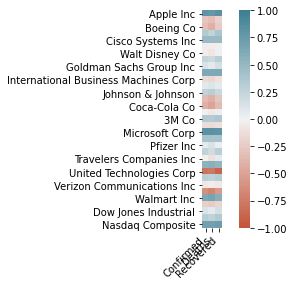

In [104]:
ax = sns.heatmap(
    CDR_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [105]:
# Set default format for float to percentage
pd.options.display.float_format = '{:.2f}'.format

In [106]:
# Confirmed and Walmart Correlation Coefficient and p-value
stats.pearsonr(covid_yfinance_df['Confirmed'], covid_yfinance_df['Walmart Inc'])

(0.6381779378290088, 4.128898077558587e-16)

There is not a statistical significance between Confirmed cases and Walmart Inc due to the p-value being near .5 and a correlation coefficient of -.099 which indicates a slight negative correlation.

Walmart has a stock loss of 2.65%

In [107]:
# Confirmed and Microsoft correlation coefficient and p-value
stats.pearsonr(covid_yfinance_df['Confirmed'], covid_yfinance_df['Microsoft Corp'])

(0.8318050454932888, 2.8815803189995143e-34)

There is a statistical significance between Confirmed and Microsoft Corp due to the p-value being so small and a correlation coefficient of -.463 which indicates a negative correlation.

Microsoft has a stock loss of 6.04%

In [108]:
# Confirmed and Boeing correlation coefficient and p-value
stats.pearsonr(covid_yfinance_df['Confirmed'], covid_yfinance_df['Boeing Co'])

(-0.32557372542639634, 0.00016660012669797688)

There is a statistical significance between saleprice and lotarea due to the p-value being so small and a correlation coefficient of -.699 which indicates a strong negative correlation.

Boeing has a stock loss of 59.87%

# Stocks with least correlation to the infection rate of the coronavirus(covid-19) also have least drop in stock price.

Walmart has the least correlation and % stock market loss

Boeing has the highest correlation and % stock market loss

## Next Steps:

1. Evaluate which sectors/markets have the highest correlation to covid-19 infection rate
2. Input all of S&P 500 stocks into dataframe